# Model Building

## Imports and Installs

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb

In [2]:
# Define the path to the file
file_path = r"C:\Users\aariz\Documents\AUS\Semester 8\COE 444\Project\Dataset\Final\Processed_Dataset_Final.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
df.shape

(8775013, 47)

In [4]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,138.2,7.1,83.1,39123.054540,39123.054540,0.0,0.0,0.0,0.0,0.5,...,99.0,1.694703e+08,5.5,15.954786,82.751168,3899.571692,0.9,38.5,Benign,Benign
1,86.0,4.2,44.8,72928.095973,72928.095973,0.0,0.0,0.0,0.0,0.3,...,64.4,1.694703e+08,13.5,13.405243,63.022662,1993.712535,1.0,244.6,Benign,Benign
2,171.4,4.1,32.0,52552.111857,52552.111857,0.0,0.0,0.0,0.0,0.2,...,152.1,9.108920e-02,5.5,14.407632,209.990584,42487.982728,0.9,38.5,Benign,Benign
3,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604610,1.0,244.6,Benign,Benign
4,347.6,7.1,64.0,6263.156480,6263.156480,0.0,0.0,0.0,0.0,0.5,...,162.5,9.976871e-02,5.5,15.169114,164.378795,30786.754580,0.9,38.5,Benign,Benign


In [5]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
8775008,9239255.500,17.0,64.0,179.848711,179.848711,0.0,0.0,0.0,0.0,0.0,...,841.300000,3.551102e-03,5.5,47.725866,234.290907,71887.233230,0.400000,38.500000,ARP Spoofing,Spoofing
8775009,7394141.600,17.0,64.0,179.835432,179.835432,0.0,0.0,0.0,0.0,0.0,...,174.000000,1.694024e+08,13.5,35.406877,722.481741,261080.788500,1.000000,244.600000,ARP Spoofing,Spoofing
8775010,9244144.300,17.0,64.0,179.817936,179.817936,0.0,0.0,0.0,0.0,0.0,...,155.600000,6.567001e-03,5.5,16.870446,66.489690,2760.536111,0.900000,38.500000,ARP Spoofing,Spoofing
8775011,9245943.800,17.0,64.0,179.787417,179.787417,0.0,0.0,0.0,0.0,0.0,...,195.700000,1.694024e+08,13.5,18.379019,87.360431,3816.028882,1.000000,244.600000,ARP Spoofing,Spoofing
8775012,9247477.333,17.0,64.0,179.763126,179.763126,0.0,0.0,0.0,0.0,0.0,...,508.666667,9.183963e-03,2.0,21.508466,258.633119,80933.935190,0.666667,4.666667,ARP Spoofing,Spoofing


In [6]:
# Check for missing values in the entire DataFrame
print("Missing values in each column:\n", df.isnull().sum())

# Check for any missing value in the entire DataFrame
print("Any missing value in the DataFrame:", df.isnull().values.any())

Missing values in each column:
 Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
Attack             0
Ca

In [7]:
# Initialize the label encoders for each categorical column
label_encoder_attack = LabelEncoder()
label_encoder_category = LabelEncoder()

# Fit the label encoders and transform the categorical columns to integers
df['Attack'] = label_encoder_attack.fit_transform(df['Attack'])
df['Category'] = label_encoder_category.fit_transform(df['Category'])


In [8]:
attack_mappings = {index: label for index, label in enumerate(label_encoder_attack.classes_)}
print('Attack Mappings:', attack_mappings)

# Getting the class mappings for 'Category'
category_mappings = {index: label for index, label in enumerate(label_encoder_category.classes_)}
print('Category Mappings:', category_mappings)

Attack Mappings: {0: 'ARP Spoofing', 1: 'Benign', 2: 'DDoS-Connect-Flood', 3: 'DDoS-ICMP', 4: 'DDoS-Publish-Flood', 5: 'DDoS-SYN', 6: 'DDoS-TCP', 7: 'DDoS-UDP', 8: 'DoS-Connect-Flood', 9: 'DoS-ICMP', 10: 'DoS-Publish-Flood', 11: 'DoS-SYN', 12: 'DoS-TCP', 13: 'DoS-UDP', 14: 'Malformed-Data', 15: 'OS-Scan', 16: 'Ping-Sweep', 17: 'Port-Scan', 18: 'VulScan'}
Category Mappings: {0: 'Benign', 1: 'DDoS', 2: 'DoS', 3: 'MQTT', 4: 'Recon', 5: 'Spoofing'}


In [9]:
# Generate summary statistics for the DataFrame
summary_statistics = df.describe()

# Include 'object' columns in the summary statistics (categorical columns)
summary_statistics_including_objects = df.describe(include='all')

print("Summary Statistics:\n", summary_statistics)
print("\nSummary Statistics Including Categorical Columns:\n", summary_statistics_including_objects)


Summary Statistics:
        Header_Length  Protocol Type      Duration          Rate         Srate  \
count   8.775013e+06   8.775013e+06  8.775013e+06  8.775013e+06  8.775013e+06   
mean    2.996247e+04   8.047203e+00  6.463691e+01  1.574449e+04  1.574449e+04   
std     2.823634e+05   6.304832e+00  7.853066e+00  4.000855e+04  4.000855e+04   
min     0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.170000e+00   1.050000e+00  6.400000e+01  6.422731e+00  6.422731e+00   
50%     1.080000e+02   6.000000e+00  6.400000e+01  1.331419e+02  1.331419e+02   
75%     1.942100e+04   1.700000e+01  6.400000e+01  1.975920e+04  1.975920e+04   
max     9.896704e+06   1.700000e+01  2.550000e+02  2.097152e+06  2.097152e+06   

           Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
count  8775013.0     8.775013e+06     8.775013e+06     8.775013e+06   
mean         0.0     5.123298e-03     1.572115e-01     3.951838e-02   
std          0.0     3.415862e-02   

In [10]:
# Selecting columns to scale (all columns except 'Attack' and 'Category')
columns_to_scale = df.columns.difference(['Attack', 'Category'])

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now, df has scaled features for all columns except 'Attack' and 'Category'

In [11]:
df.head(10)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,0.000014,0.417647,0.325882,1.865533e-02,1.865533e-02,0.0,0.0,0.0,0.0,0.5,...,0.038723,9.999968e-01,0.321429,0.148045,0.081110,0.007493,0.9,0.153941,1,0
1,0.000009,0.247059,0.175686,3.477483e-02,3.477483e-02,0.0,0.0,0.0,0.0,0.3,...,0.015217,9.999968e-01,0.892857,0.092453,0.061773,0.003831,1.0,1.000000,1,0
2,0.000017,0.241176,0.125490,2.505880e-02,2.505880e-02,0.0,0.0,0.0,0.0,0.2,...,0.074796,8.102576e-09,0.321429,0.114310,0.205826,0.081639,0.9,0.153941,1,0
3,0.000023,0.352941,0.250980,1.168373e-02,1.168373e-02,0.0,0.0,0.0,0.0,0.5,...,0.025951,9.999968e-01,0.892857,0.148745,0.298283,0.089653,1.0,1.000000,1,0
4,0.000035,0.417647,0.250980,2.986506e-03,2.986506e-03,0.0,0.0,0.0,0.0,0.5,...,0.081861,8.153792e-09,0.321429,0.130913,0.161119,0.059155,0.9,0.153941,1,0
5,0.000042,0.352941,0.250980,1.336756e-06,1.336756e-06,0.0,0.0,0.0,0.0,0.5,...,0.026291,9.999968e-01,0.892857,0.157651,0.295204,0.087792,1.0,1.000000,1,0
6,0.000047,0.352941,0.250980,1.068191e-02,1.068191e-02,0.0,0.0,0.0,0.0,0.5,...,0.026359,8.156487e-09,0.321429,0.067822,0.015005,0.000263,0.9,0.153941,1,0
7,0.000064,0.352941,0.250980,1.092751e-06,1.092751e-06,0.0,0.0,0.0,0.0,0.5,...,0.024592,9.999968e-01,0.892857,0.074283,0.021929,0.000482,1.0,1.000000,1,0
8,0.000062,0.352941,0.250980,9.179035e-07,9.179035e-07,0.0,0.0,0.0,0.0,0.5,...,0.024660,7.565952e-09,0.321429,0.074218,0.021783,0.000540,0.9,0.153941,1,0
9,0.000076,0.482353,0.325882,1.020575e-06,1.020575e-06,0.0,0.0,0.0,0.0,0.4,...,0.043614,9.999968e-01,0.892857,0.097957,0.065306,0.004534,1.0,1.000000,1,0


## Running all Classifiers

In [12]:
# Prepare your data
X = df.drop(columns=['Attack', 'Category'])
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify = y)

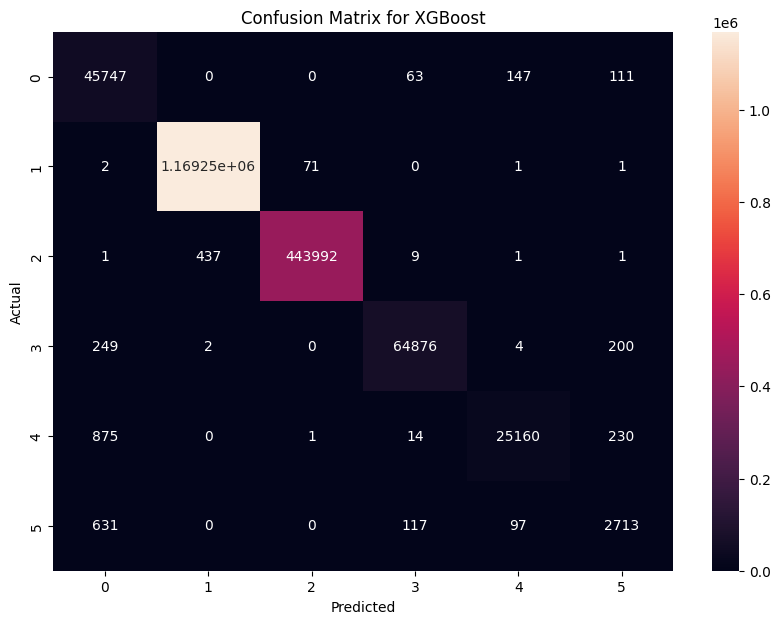

Results for XGBoost:

Accuracy: 0.9981396043197647
Precision (Weighted): 0.9981359257411603
Recall (Weighted): 0.9981396043197647
F1 Score (Weighted): 0.9981242023865224

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      0.99      0.99     65331
           4       0.99      0.96      0.97     26280
           5       0.83      0.76      0.80      3558

    accuracy                           1.00   1755003
   macro avg       0.96      0.95      0.96   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



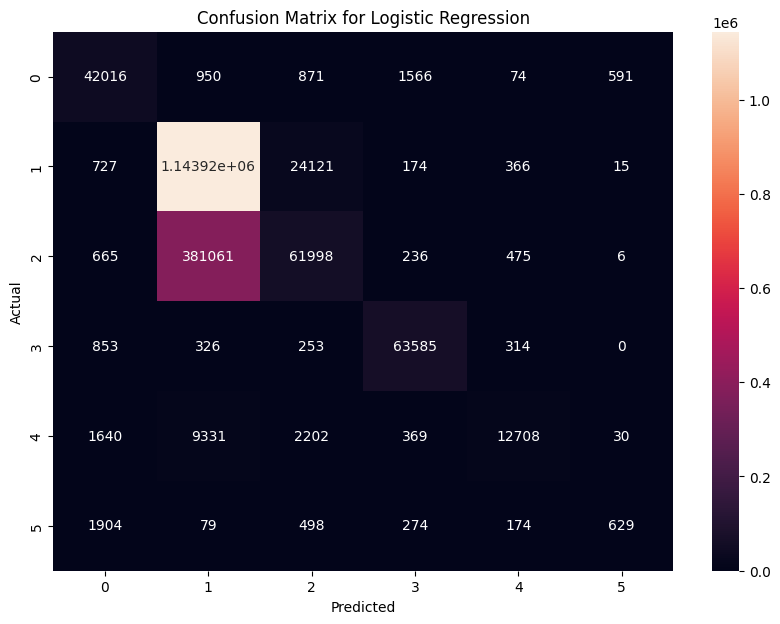

Results for Logistic Regression:

Accuracy: 0.7549035528714196
Precision (Weighted): 0.7441868887054903
Recall (Weighted): 0.7549035528714196
F1 Score (Weighted): 0.6917304177531421

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     46068
           1       0.74      0.98      0.85   1169325
           2       0.69      0.14      0.23    444441
           3       0.96      0.97      0.97     65331
           4       0.90      0.48      0.63     26280
           5       0.49      0.18      0.26      3558

    accuracy                           0.75   1755003
   macro avg       0.78      0.61      0.64   1755003
weighted avg       0.74      0.75      0.69   1755003


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


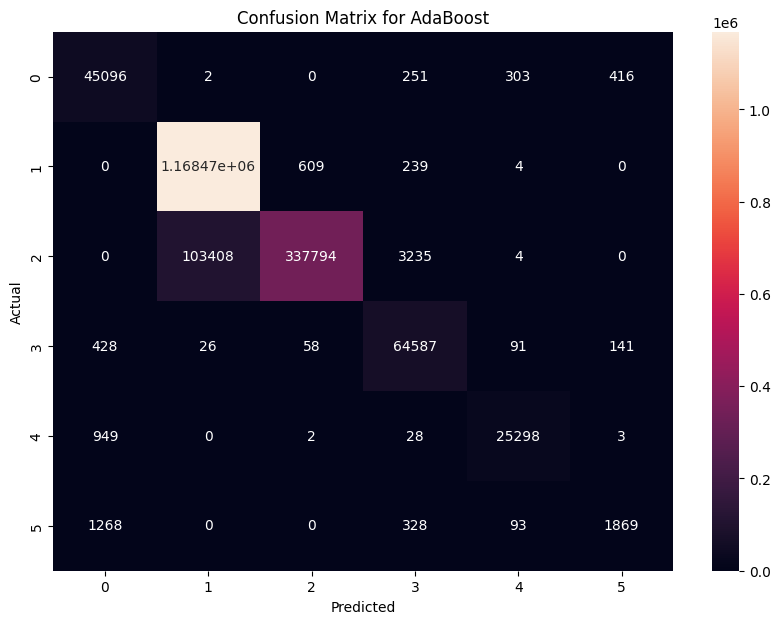

Results for AdaBoost:

Accuracy: 0.9362474024260927
Precision (Weighted): 0.940893767268596
Recall (Weighted): 0.9362474024260927
F1 Score (Weighted): 0.9332850746577781

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     46068
           1       0.92      1.00      0.96   1169325
           2       1.00      0.76      0.86    444441
           3       0.94      0.99      0.96     65331
           4       0.98      0.96      0.97     26280
           5       0.77      0.53      0.62      3558

    accuracy                           0.94   1755003
   macro avg       0.93      0.87      0.89   1755003
weighted avg       0.94      0.94      0.93   1755003


-----------------------



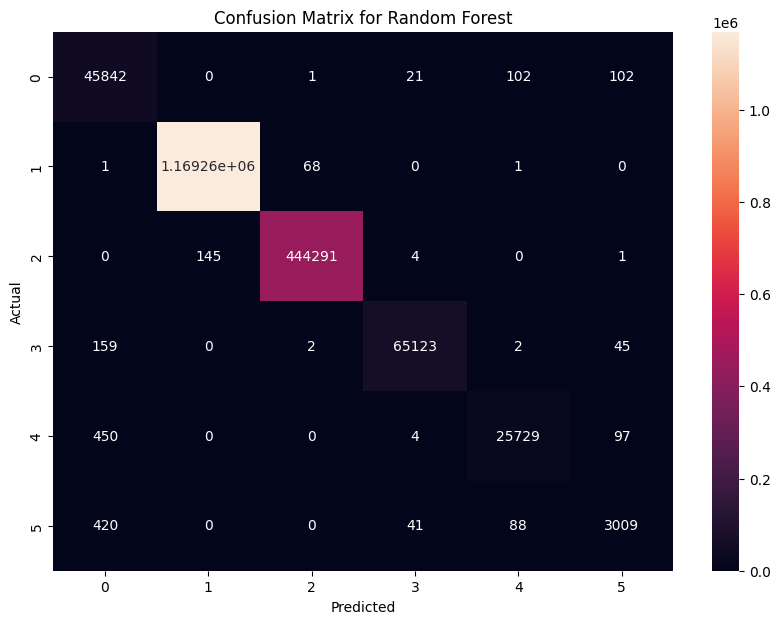

Results for Random Forest:

Accuracy: 0.9990005715089946
Precision (Weighted): 0.9989959914496708
Recall (Weighted): 0.9990005715089946
F1 Score (Weighted): 0.9989920308933021

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      1.00      1.00     65331
           4       0.99      0.98      0.99     26280
           5       0.92      0.85      0.88      3558

    accuracy                           1.00   1755003
   macro avg       0.98      0.97      0.98   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



,Model Name,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted)
0,XGBoost,0.998140,0.998136,0.998140,0.998124
1,Logistic Regression,0.754904,0.744187,0.754904,0.691730
2,AdaBoost,0.936247,0.940894,0.936247,0.933285
3,Random Forest,0.999001,0.998996,0.999001,0.998992


In [13]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# PCA Analysis

In [13]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb

In [15]:
pca = PCA(n_components=0.95)  # Adjust n_components based on your dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Checking the number of components
num_components = pca.n_components_
print("Number of principal components retained:", num_components)

Number of principal components retained: 6


In [19]:
X_train_pca = []
X_test_pca = []

545

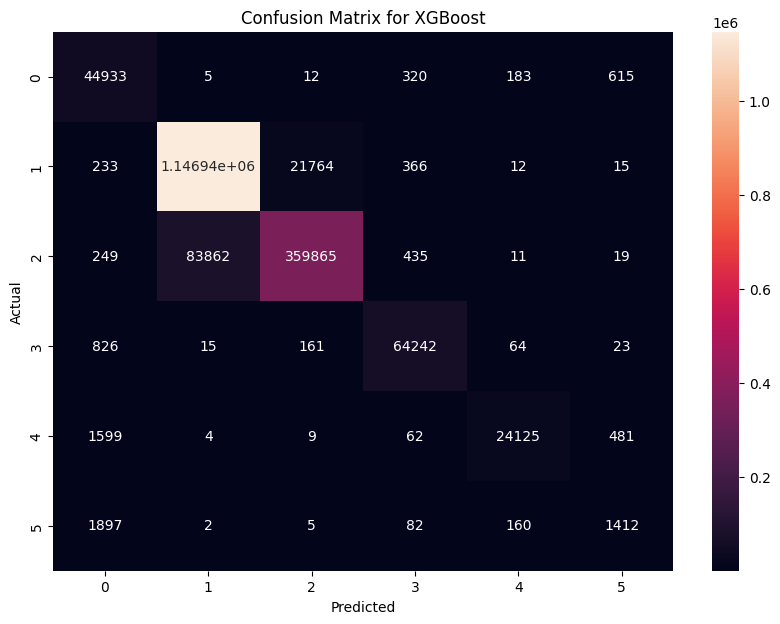

Results for XGBoost:

Accuracy: 0.9353328740748591
Precision (Weighted): 0.9356019841680161
Recall (Weighted): 0.9353328740748591
F1 Score (Weighted): 0.933696673706558

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     46068
           1       0.93      0.98      0.96   1169325
           2       0.94      0.81      0.87    444441
           3       0.98      0.98      0.98     65331
           4       0.98      0.92      0.95     26280
           5       0.55      0.40      0.46      3558

    accuracy                           0.94   1755003
   macro avg       0.88      0.84      0.86   1755003
weighted avg       0.94      0.94      0.93   1755003


-----------------------



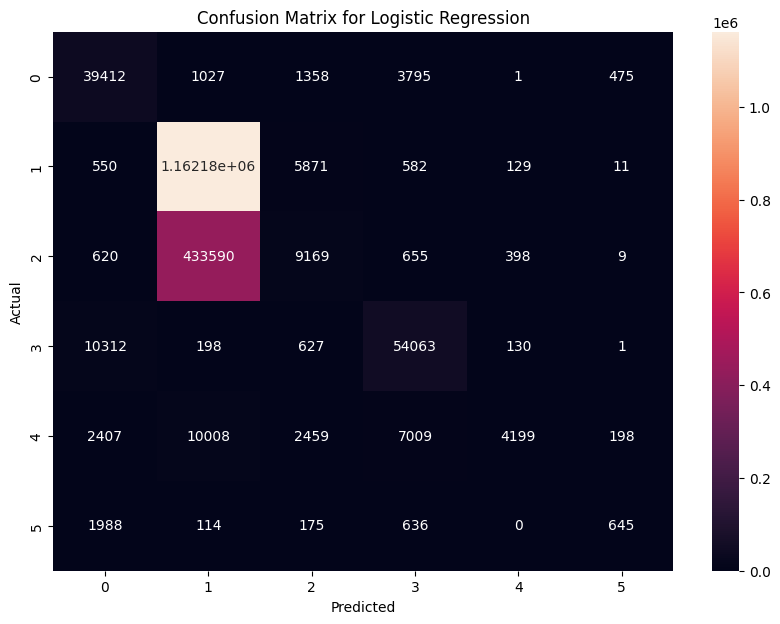

Results for Logistic Regression:

Accuracy: 0.723457452779283
Precision (Weighted): 0.6627198762864696
Recall (Weighted): 0.723457452779283
F1 Score (Weighted): 0.6232619198795234

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78     46068
           1       0.72      0.99      0.84   1169325
           2       0.47      0.02      0.04    444441
           3       0.81      0.83      0.82     65331
           4       0.86      0.16      0.27     26280
           5       0.48      0.18      0.26      3558

    accuracy                           0.72   1755003
   macro avg       0.68      0.51      0.50   1755003
weighted avg       0.66      0.72      0.62   1755003


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


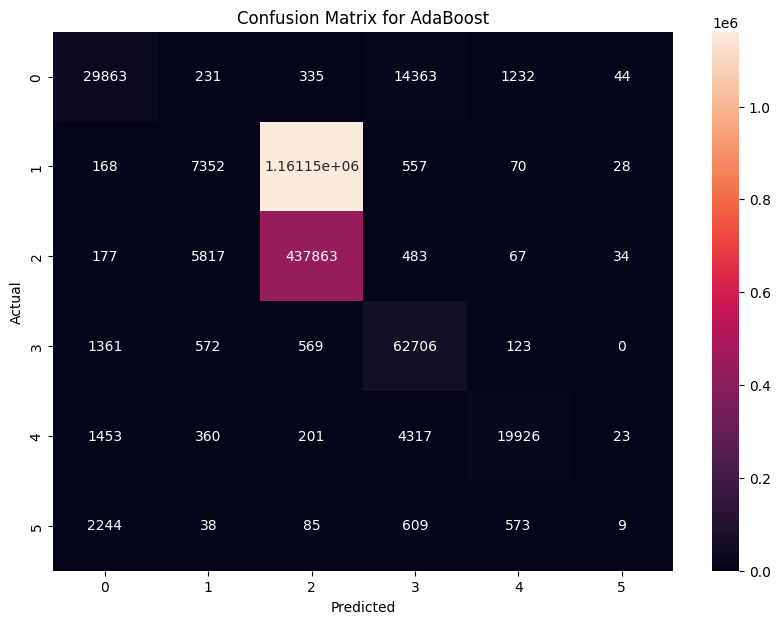

Results for AdaBoost:

Accuracy: 0.3177880607611497
Precision (Weighted): 0.47421839115553305
Recall (Weighted): 0.3177880607611497
F1 Score (Weighted): 0.179855582141072

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.73     46068
           1       0.51      0.01      0.01   1169325
           2       0.27      0.99      0.43    444441
           3       0.76      0.96      0.85     65331
           4       0.91      0.76      0.83     26280
           5       0.07      0.00      0.00      3558

    accuracy                           0.32   1755003
   macro avg       0.56      0.56      0.48   1755003
weighted avg       0.47      0.32      0.18   1755003


-----------------------



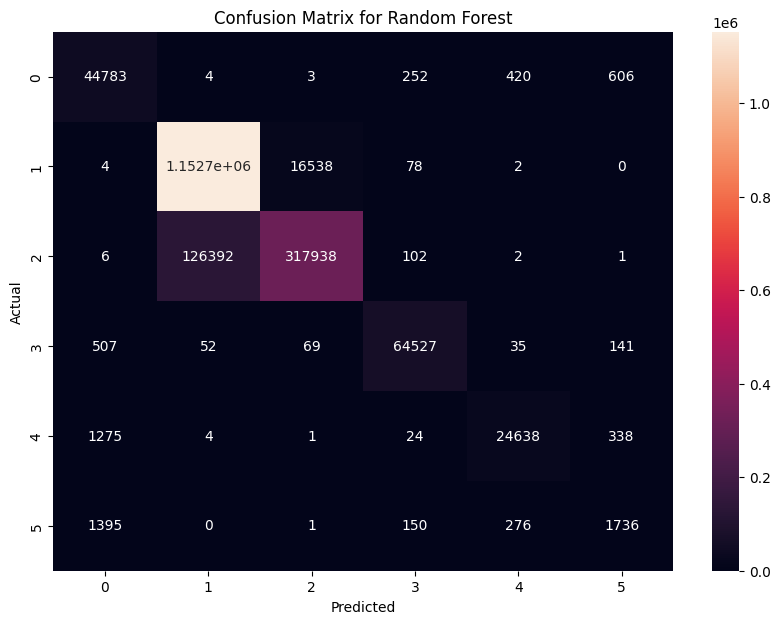

Results for Random Forest:

Accuracy: 0.9152833356980017
Precision (Weighted): 0.9182552628561043
Recall (Weighted): 0.9152833356980017
F1 Score (Weighted): 0.9112776120951634

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     46068
           1       0.90      0.99      0.94   1169325
           2       0.95      0.72      0.82    444441
           3       0.99      0.99      0.99     65331
           4       0.97      0.94      0.95     26280
           5       0.62      0.49      0.54      3558

    accuracy                           0.92   1755003
   macro avg       0.89      0.85      0.87   1755003
weighted avg       0.92      0.92      0.91   1755003


-----------------------



,Model Name,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted)
0,XGBoost,0.935333,0.935602,0.935333,0.933697
1,Logistic Regression,0.723457,0.662720,0.723457,0.623262
2,AdaBoost,0.317788,0.474218,0.317788,0.179856
3,Random Forest,0.915283,0.918255,0.915283,0.911278


In [17]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# Feature Selection (using RFE + Random Forest)

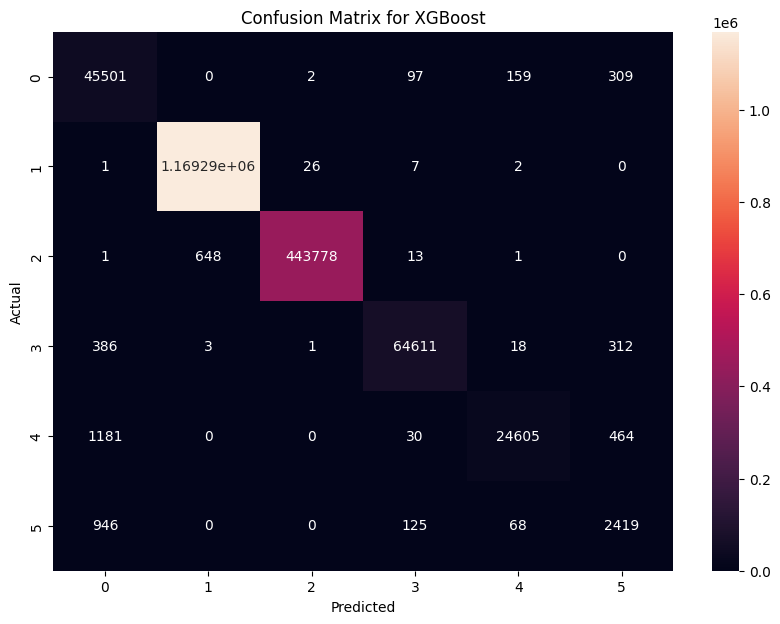

Results for XGBoost:

Accuracy: 0.997264961940236
Precision (Weighted): 0.9973045603380293
Recall (Weighted): 0.9973045603380293
F1 Score (Weighted): 0.9972619459747034

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      0.99      0.99     65331
           4       0.99      0.94      0.96     26280
           5       0.69      0.68      0.69      3558

    accuracy                           1.00   1755003
   macro avg       0.94      0.93      0.93   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



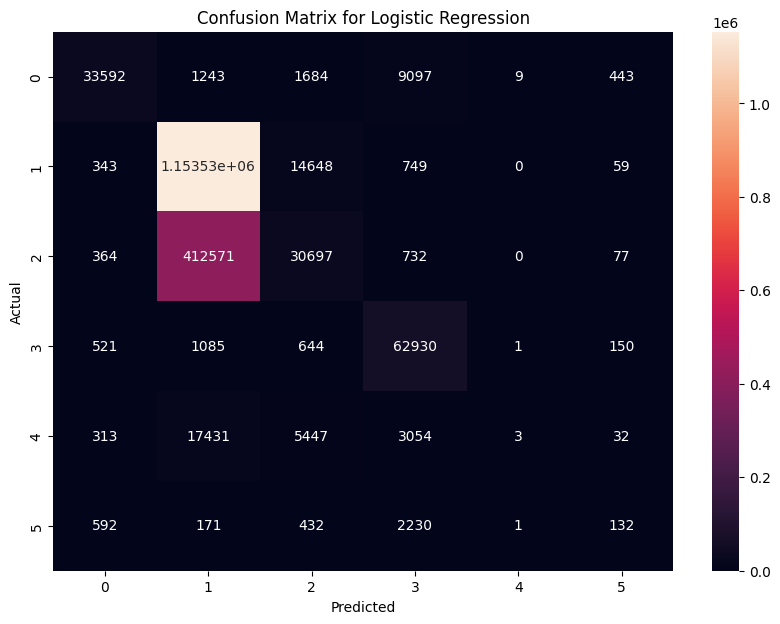

Results for Logistic Regression:

Accuracy: 0.7298449062480236
Precision (Weighted): 0.6876751386149234
Recall (Weighted): 0.6876751386149234
F1 Score (Weighted): 0.6432896197869166

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82     46068
           1       0.73      0.99      0.84   1169325
           2       0.57      0.07      0.12    444441
           3       0.80      0.96      0.87     65331
           4       0.21      0.00      0.00     26280
           5       0.15      0.04      0.06      3558

    accuracy                           0.73   1755003
   macro avg       0.57      0.46      0.45   1755003
weighted avg       0.69      0.73      0.64   1755003


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


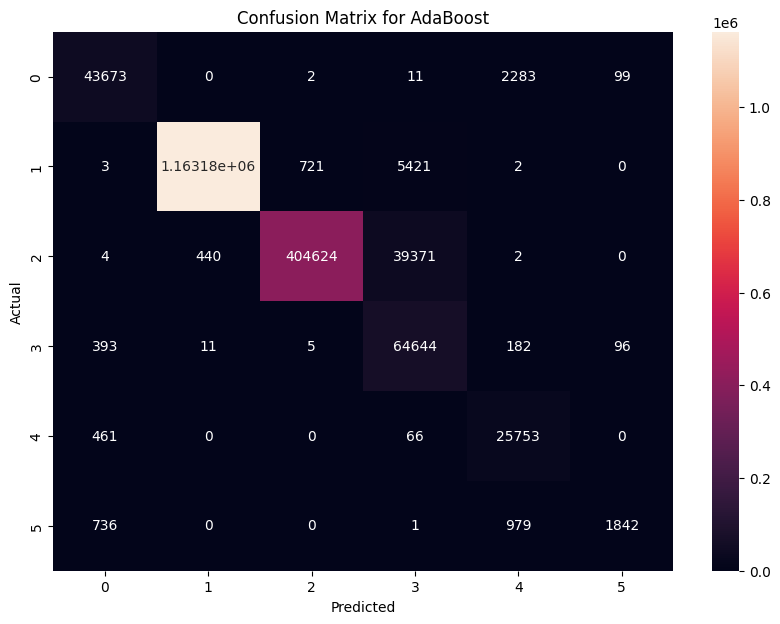

Results for AdaBoost:

Accuracy: 0.9707755485318259
Precision (Weighted): 0.9811466812043881
Recall (Weighted): 0.9811466812043881
F1 Score (Weighted): 0.9734211151907847

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     46068
           1       1.00      0.99      1.00   1169325
           2       1.00      0.91      0.95    444441
           3       0.59      0.99      0.74     65331
           4       0.88      0.98      0.93     26280
           5       0.90      0.52      0.66      3558

    accuracy                           0.97   1755003
   macro avg       0.89      0.89      0.87   1755003
weighted avg       0.98      0.97      0.97   1755003


-----------------------



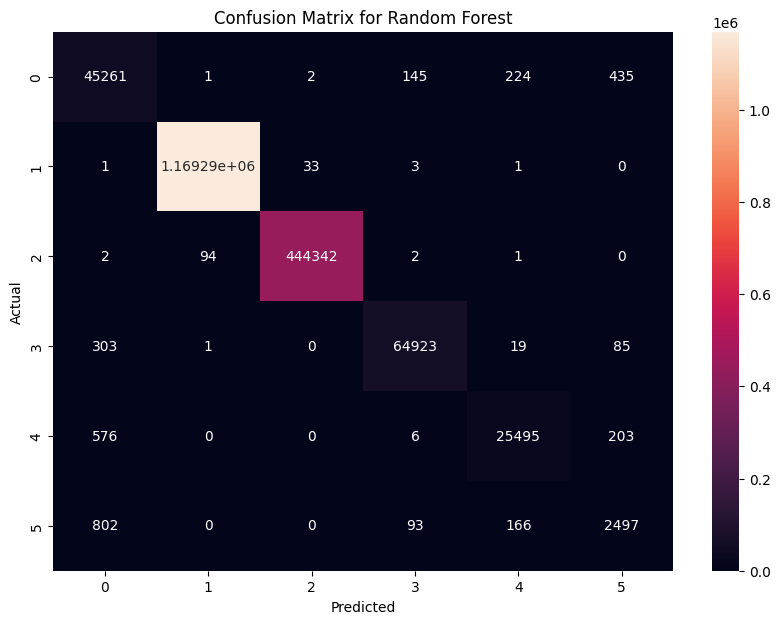

Results for Random Forest:

Accuracy: 0.9981777808926823
Precision (Weighted): 0.9981487357561051
Recall (Weighted): 0.9981487357561051
F1 Score (Weighted): 0.9981564549655595

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      0.99      0.99     65331
           4       0.98      0.97      0.98     26280
           5       0.78      0.70      0.74      3558

    accuracy                           1.00   1755003
   macro avg       0.95      0.94      0.95   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



,Model Name,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted)
0,XGBoost,0.997265,0.997305,0.997305,0.997262
1,Logistic Regression,0.729845,0.687675,0.687675,0.643290
2,AdaBoost,0.970776,0.981147,0.981147,0.973421
3,Random Forest,0.998178,0.998149,0.998149,0.998156


In [18]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can choose any model

# Setup RFE with the RandomForestClassifier and select 10 features as an example
selector = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Transform data based on selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers using the selected features
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = precision_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# Feature Selection using K-OFSD (from literature)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.base import clone
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from joblib import Parallel, delayed

In [13]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed

In [32]:
def calculate_class_weights(y):
    """Calculate class weights inversely proportional to class frequencies."""
    from sklearn.utils.class_weight import compute_class_weight
    classes = np.unique(y)
    class_weights = compute_class_weight('balanced', classes=classes, y=y)
    weight_dict = dict(zip(classes, class_weights))
    return weight_dict

def calculate_dependency(X, y, indices, k=5, class_weights=None):
    """Calculate the dependency with potential class weighting."""
    nbrs = NearestNeighbors(n_neighbors=k).fit(X[:, indices])
    _, neighbors = nbrs.kneighbors(X[:, indices])

    dependency = 0
    num_classes = len(np.unique(y))
    for i in range(X.shape[0]):
        class_counts = np.bincount(y[neighbors[i]], minlength=num_classes)
        weighted_counts = class_counts * class_weights[y[i]]  # Apply weights
        dependency += np.max(weighted_counts) / k
    
    return dependency / X.shape[0]

# Usage in k_ofsd:
def k_ofsd(X, y, k=5, alpha=0.5, dynamic_k=False):
    """K-OFSD with optional dynamic k based on data variance."""
    class_weights = calculate_class_weights(y)  # Calculate class weights
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = np.array(X_scaled)  # Ensure X_scaled is a numpy array
    n_features = X_scaled.shape[1]
    selected_features = []
    current_dependency = 0

    for i in range(n_features):
        candidate_features = selected_features + [i]
        if dynamic_k:
            local_variance = np.var(X_scaled[:, candidate_features], axis=0)
            k = min(10, max(3, int(local_variance * 10)))  # Adjust k based on variance

        new_dependency = calculate_dependency(X_scaled, y, candidate_features, k, class_weights)
        if new_dependency > current_dependency + alpha:
            selected_features.append(i)
            current_dependency = new_dependency

    return selected_features

def k_ofsd_parallel(X, y, k=5, alpha=0.5, dynamic_k=False, n_jobs=-1):
    """Parallel K-OFSD with optional dynamic k."""
    class_weights = calculate_class_weights(y)  # Calculate class weights
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = np.array(X_scaled)  # Ensure X_scaled is a numpy array
    n_features = X_scaled.shape[1]
    selected_features = []
    current_dependency = 0

    results = Parallel(n_jobs=n_jobs)(delayed(parallel_dependency_calculation)(i, X_scaled, y, selected_features, k, alpha, current_dependency, class_weights)
                                      for i in range(n_features))

    for result in results:
        if result is not None:
            selected_features.append(result)
            # Update current_dependency with the newly added feature
            candidate_features = selected_features + [result]
            current_dependency = calculate_dependency(X_scaled, y, candidate_features, k, class_weights)

    return selected_features

In [33]:
# Assuming you have already run:
selected_features = k_ofsd(X_train, y_train, k=5, alpha=0.5, dynamic_k=True)

# Apply the selected features to X_train
X_train_selected = X_train.iloc[:, selected_features]

# Apply the same selected features to X_test
X_test_selected = X_test.iloc[:, selected_features]


KeyError: '[43260, 55596] not in index'

In [ ]:
# Define the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers using the selected features
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# Handling imbalance using SMOTE

*Run this column and then the 3 experiments will use this SMOTE train/test split for their purposes*

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
# Prepare your data
X = df.drop(columns=['Attack', 'Category'])
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify = y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## On entire dataset


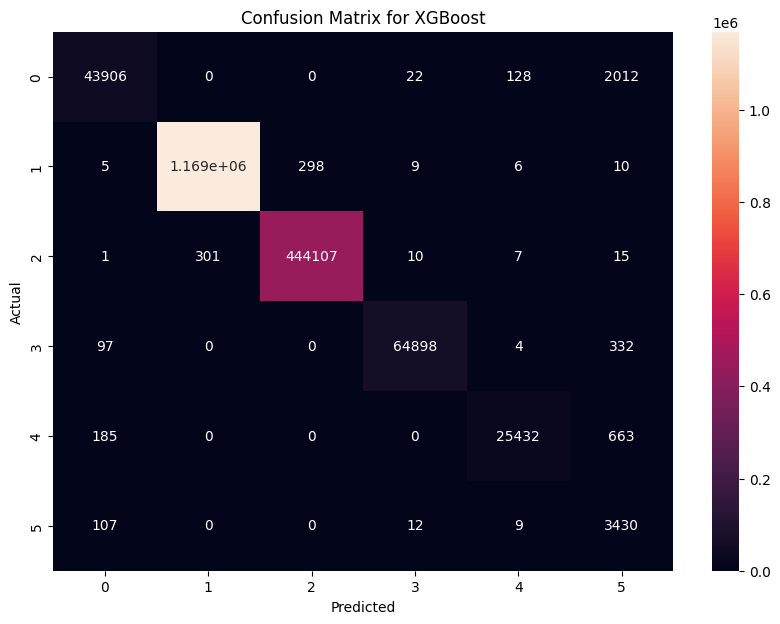

Results for XGBoost:

Accuracy: 0.9975880383110456
Precision (Weighted): 0.9983528784518793
Recall (Weighted): 0.9975880383110456
F1 Score (Weighted): 0.997830481513684

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      0.99      1.00     65331
           4       0.99      0.97      0.98     26280
           5       0.53      0.96      0.68      3558

    accuracy                           1.00   1755003
   macro avg       0.92      0.98      0.94   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



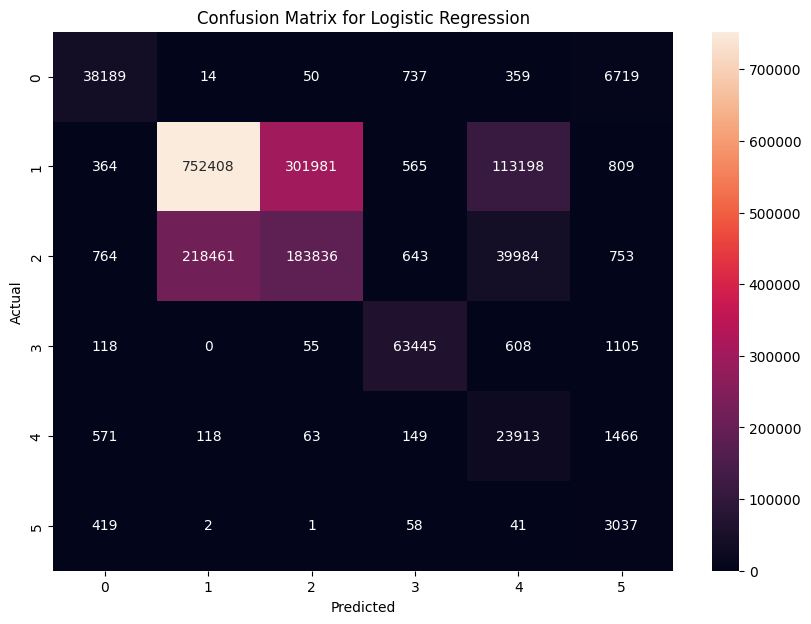

Results for Logistic Regression:

Accuracy: 0.6067385639796627
Precision (Weighted): 0.6753366562161779
Recall (Weighted): 0.6067385639796627
F1 Score (Weighted): 0.6319864843462298

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     46068
           1       0.77      0.64      0.70   1169325
           2       0.38      0.41      0.40    444441
           3       0.97      0.97      0.97     65331
           4       0.13      0.91      0.23     26280
           5       0.22      0.85      0.35      3558

    accuracy                           0.61   1755003
   macro avg       0.57      0.77      0.59   1755003
weighted avg       0.68      0.61      0.63   1755003


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


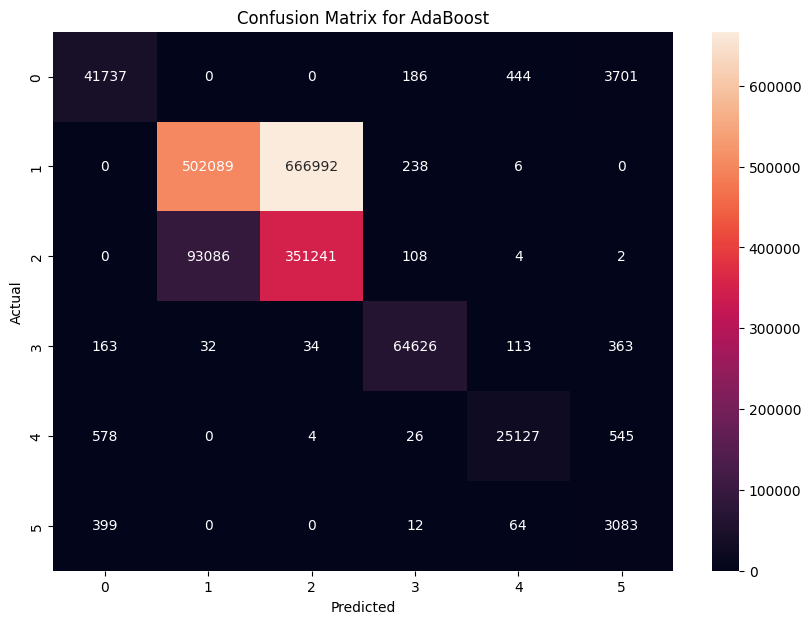

Results for AdaBoost:

Accuracy: 0.5629067300739656
Precision (Weighted): 0.7272683035094205
Recall (Weighted): 0.5629067300739656
F1 Score (Weighted): 0.5778649423332322

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     46068
           1       0.84      0.43      0.57   1169325
           2       0.34      0.79      0.48    444441
           3       0.99      0.99      0.99     65331
           4       0.98      0.96      0.97     26280
           5       0.40      0.87      0.55      3558

    accuracy                           0.56   1755003
   macro avg       0.75      0.82      0.75   1755003
weighted avg       0.73      0.56      0.58   1755003


-----------------------



MemoryError: Unable to allocate 214. MiB for an array with shape (28063788,) and data type float64

In [15]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers using the SMOTE-balanced data
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

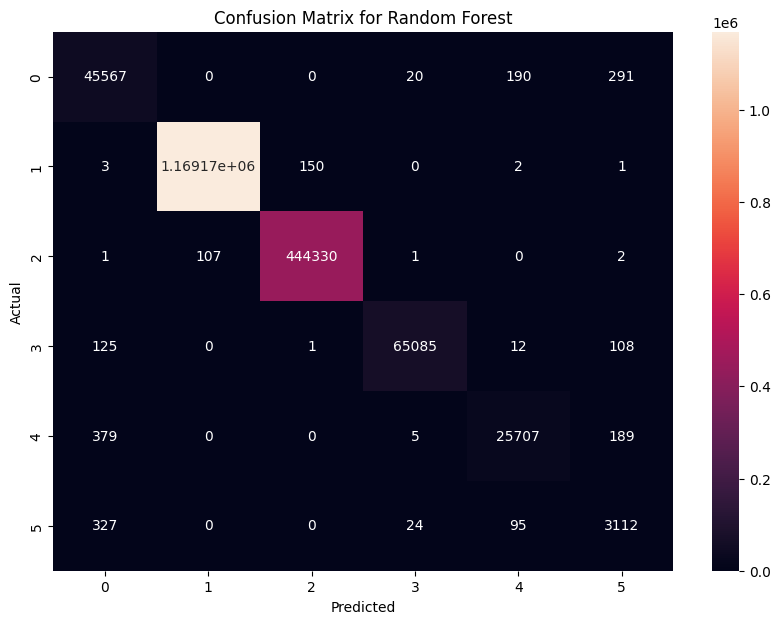

Results for Random Forest:

Accuracy: 0.9988415974217708
Precision (Weighted): 0.9988563328515235
Recall (Weighted): 0.9988415974217708
F1 Score (Weighted): 0.9988474453172602

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      1.00      1.00     65331
           4       0.99      0.98      0.98     26280
           5       0.84      0.87      0.86      3558

    accuracy                           1.00   1755003
   macro avg       0.97      0.97      0.97   1755003
weighted avg       1.00      1.00      1.00   1755003


-----------------------



,Model Name,Accuracy,Precision (Weighted),Recall (Weighted),F1 (Weighted)
0,Random Forest,0.998842,0.998856,0.998842,0.998847


In [11]:
# Defining the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers using the SMOTE-balanced data
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

## PCA with SMOTE

In [15]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Apply PCA to the balanced training data to retain 95% of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

# Output the number of principal components retained
print("Number of principal components retained:", pca.n_components_)

Number of principal components retained: 10


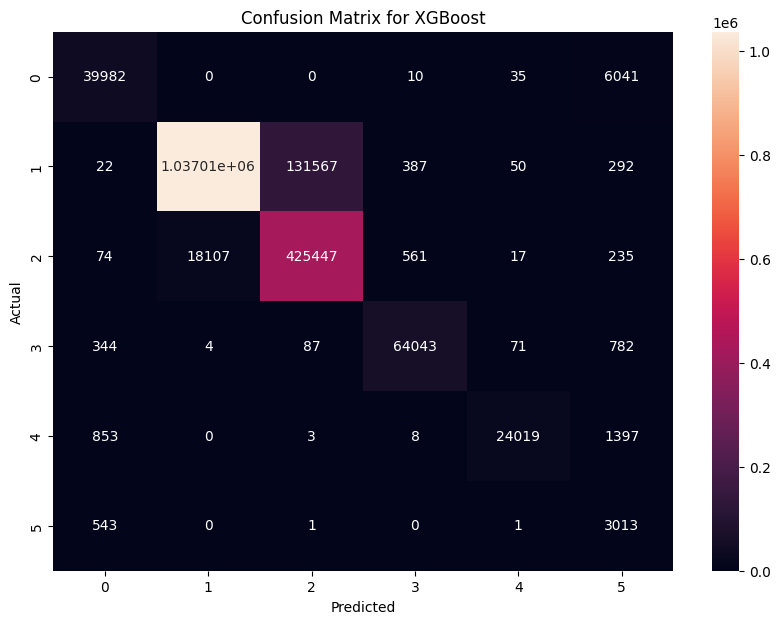

Results for XGBoost:

Accuracy: 0.9079819236776233
Precision (Weighted): 0.9253945418849727
Recall (Weighted): 0.9079819236776233
F1 Score (Weighted): 0.9118877850573519

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     46068
           1       0.98      0.89      0.93   1169325
           2       0.76      0.96      0.85    444441
           3       0.99      0.98      0.98     65331
           4       0.99      0.91      0.95     26280
           5       0.26      0.85      0.39      3558

    accuracy                           0.91   1755003
   macro avg       0.82      0.91      0.84   1755003
weighted avg       0.93      0.91      0.91   1755003


-----------------------



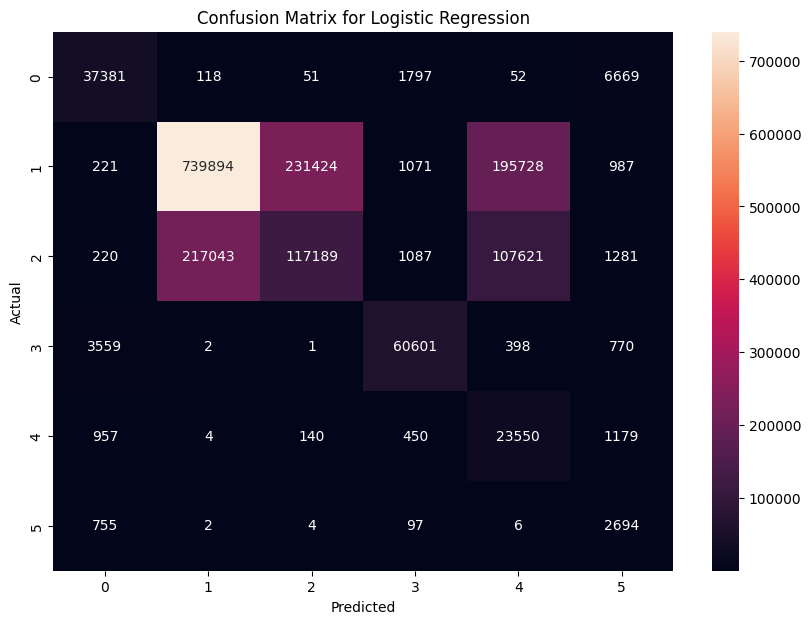

Results for Logistic Regression:

Accuracy: 0.5591494715393649
Precision (Weighted): 0.6590763253850342
Recall (Weighted): 0.5591494715393648
F1 Score (Weighted): 0.5977330278658461

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     46068
           1       0.77      0.63      0.70   1169325
           2       0.34      0.26      0.30    444441
           3       0.93      0.93      0.93     65331
           4       0.07      0.90      0.13     26280
           5       0.20      0.76      0.31      3558

    accuracy                           0.56   1755003
   macro avg       0.53      0.71      0.53   1755003
weighted avg       0.66      0.56      0.60   1755003


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


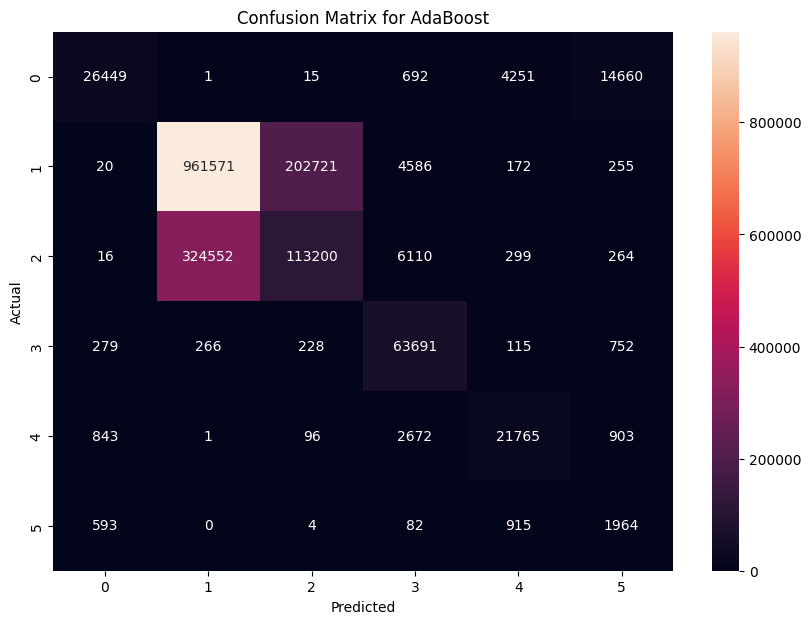

Results for AdaBoost:

Accuracy: 0.677286591532892
Precision (Weighted): 0.6558218985786683
Recall (Weighted): 0.677286591532892
F1 Score (Weighted): 0.6614445385714316

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71     46068
           1       0.75      0.82      0.78   1169325
           2       0.36      0.25      0.30    444441
           3       0.82      0.97      0.89     65331
           4       0.79      0.83      0.81     26280
           5       0.10      0.55      0.18      3558

    accuracy                           0.68   1755003
   macro avg       0.63      0.67      0.61   1755003
weighted avg       0.66      0.68      0.66   1755003


-----------------------



MemoryError: Unable to allocate 214. MiB for an array with shape (28063788,) and data type int64

In [17]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers on the PCA-transformed data
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train_smote)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

## Feature Selection (K-OFSD) + SMOTE

In [ ]:
# Assuming you have already run:
selected_features = k_ofsd_parallel(X_train_smote, y_train_smote, k=5, alpha=0.5, dynamic_k=True, n_jobs=-1)

# Apply the selected features to X_train
X_train_selected_smote = X_train_smote[:, selected_features]

# Apply the same selected features to X_test
X_test_selected_smote = X_test[:, selected_features]

In [ ]:
# Iterate, train, and evaluate classifiers using the selected features from SMOTE balanced data
results_smote = []
for name, clf in classifiers.items():
    clf.fit(X_train_selected_smote, y_train_smote)  # Notice using SMOTE balanced data here
    y_pred = clf.predict(X_test_selected_smote)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name} (with SMOTE)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name} (with SMOTE):\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results_smote.append([name, accuracy, precision, recall, f1])

# Summary table with SMOTE
results_df_smote = pd.DataFrame(results_smote, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df_smote

*Next steps:* 

1. Run XGBoost 
2. Aggregate Spoofing Class with CIC-IoT 2022 Data
    - Check if columns are same 
    - Check if data distribution is the same
3. Run models again, get eval metrics
4. PCA, Feature Selection
4. Run models again

Store all metrics, results of before and after and put into Google Doc

## Imbalanced Pipeline

c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\imblearn\ensemble\_forest.py

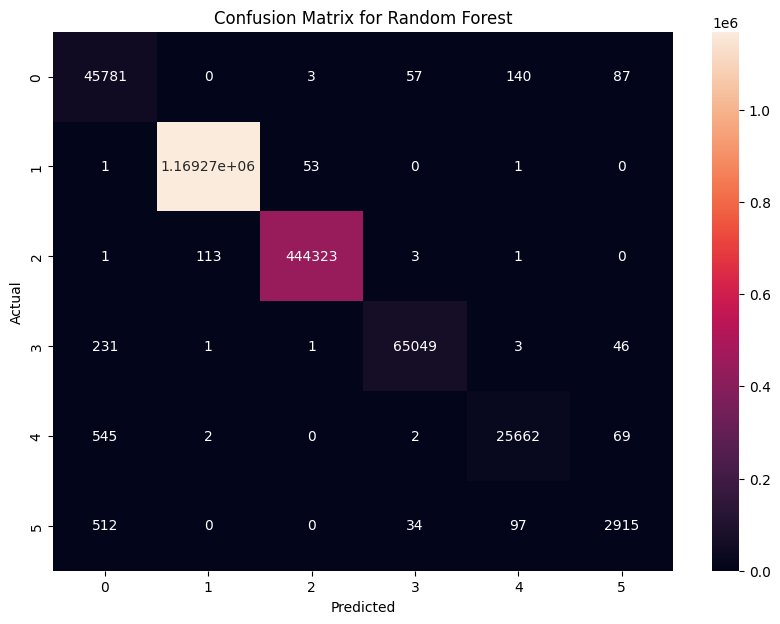

Results for Random Forest:

Accuracy: 0.9988586914096443
Precision (Weighted): 0.9988559106110215
Recall (Weighted): 0.9988586914096443
F1 Score (Weighted): 0.9988457035595694

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     46068
           1       1.00      1.00      1.00   1169325
           2       1.00      1.00      1.00    444441
           3       1.00      1.00      1.00     65331
           4       0.99      0.98      0.98     26280
           5       0.94      0.82      0.87      3558

    accuracy                           1.00   1755003
   macro avg       0.98      0.96      0.97   1755003
weighted avg       1.00      1.00      1.00   1755003



In [12]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare your data
X = df.drop(columns=['Attack', 'Category'])
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify=y)

# Balancing pipeline
pipeline = imbpipeline([
    ('undersample', ClusterCentroids(random_state=85)),
    ('oversample', SMOTE(random_state=85)),
    ('clf', BalancedRandomForestClassifier(n_estimators=100, random_state=85, n_jobs= -1))
])

# Fit the balancing pipeline
pipeline.fit(X_train, y_train)

# Get feature importances and select the top 10 features
importances = pipeline.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Get indices of top 10 features
top_features = X_train.columns[indices]

# Select top 10 features for training and testing
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

X_train = []
X_test = []

# Initialize the Random Forest classifier with selected features
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=85)
random_forest.fit(X_train_selected, y_train)
y_pred = random_forest.predict(X_test_selected)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print results
print("Results for Random Forest:\n")
print("Accuracy:", accuracy)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)
print("\nClassification Report:\n", report)